## Chemical master equation

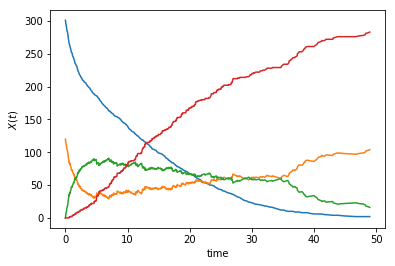

In [1]:
# Simple implementation of the Stochastic Simulation Algorithm
# (or Gillespie’s algorithm) on the Michaelis-Menten system.
#
# Parameters from Chapter 7 of
# Stochastic Modelling for Systems Biology,
# by Darren J. Wilkinson, Chapman & Hall/CRC, 2006.
#
# Translated from:
# D.J. Higham "Modeling and Simulating Chemical Reactions" SIAM REVIEW 2008 50(2) p. 347–368
# http://www.maths.strath.ac.uk/˜aas96106/algfiles.html

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Stoichiometric matrix
V = np.array(([-1, 1, 0], [-1, 1, 1], [1, -1, -1], [0, 0, 1]))
numberofreactions = 3
numberofspecies = 4

nA = 6.023e23; # Avagadro’s number
vol = 1e-15;   # volume of system

X = np.zeros(4);
X[0] = round(5e-7*nA*vol); # molecules of substrate
X[1] = round(2e-7*nA*vol); # molecules of enzyme

c = np.zeros(numberofreactions);
c[0] = 1e6/(nA*vol); c[1] = 1e-4; c[2] = 0.1;

tfinal = 50;
t = 0;
i = 0;

a = np.zeros(numberofreactions);
x1data = [];
x2data = [];
x3data = [];
x4data = [];
tdata = [];

while t < tfinal:

    x1data.append(X[0]);
    x2data.append(X[1]);
    x3data.append(X[2]);
    x4data.append(X[3]);
    tdata.append(t);
        
    a[0] = c[0]*X[0]*X[1];
    a[1] = c[1]*X[2];
    a[2] = c[2]*X[2];
    
    atot = np.sum(a);
    r = random.uniform(0, 1);
    j = np.min(np.argwhere(r < np.cumsum(a/atot)));
    tau = np.log(1.0/r)/atot;
    X = X + V[:,j]

    t = t + tau;
    i = i + 1;

# Plot results
plt.xlabel('time')
plt.ylabel('$X(t)$')
plt.plot(tdata,x1data);
plt.plot(tdata,x2data);
plt.plot(tdata,x3data);
plt.plot(tdata,x4data);
plt.show()